# Asg-5 imports 


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4939, done.
remote: Counting objects: 100% (305/305), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 4939 (delta 178), reused 202 (delta 83), pack-reused 4634
Receiving objects: 100% (4939/4939), 7.58 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (3183/3183), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

 "help(AnimatePDA)" gives you info on how to use animations with PDA 


## Question 1: 
 

Prove that this language is not regular 

$L_{if} = \{ a^i b^j c^k \;:\; i,j,k\ge 0,\; {\rm and}\; {\rm if}\; (i=2)\; {\rm then}\; (j=k)  \}$

Hint: Consider the reverse of $L_{if}$ calling it the language $LR_{if}$, prove that $LR_{if}$ is non-regular using the Pumping Lemma. Then, justify why this means that $L_{if}$ is non-regular.


- Answer:  

## Question 2:

Prove that language $Add$ is not regular 

Add = {x = y + z where x, y, and z are binary numbers and the addition yields correct result}
          
More examples of strings in the language $Add$ are below:

* String s1 = "$101=10+11$" 

* String s2 = "$1000 = 100 + 100$"

* String s3 = "$1011 = 110 + 101$"

- Answer:

## Question 3:

Design a PDA called "a2b" for the language $\{a^i b^j : i,j\ge 0, {\rm and}\; j = 2i \}$.
- Some strings in such language are: $abb$, $aabbbb$, $aaabbbbbb$, etc.
- Put a "header block" of comments (before you list the PDA transitions) that describes the overall stacking strategy. For example:
  - !! The PDA uses the stack in THIS WAY while a's arrive
  - !! Then when b's arrive, the PDA does THIS
  - !! After b's, if $a$'s arrive, the PDA does THIS
- After that, fully document your design (line by line)
- Then, test your PDA on these strings
  1. $\varepsilon$ (accept)

  2. $abb$ (accept)

  3. $aabbbb$ (accept)

  4. $aaabbbbbb$ (accept)

  5. $ab$ (reject)

  6. $b$ (reject)

  7. $aba$ (reject)

  8. $abba$ (reject)
- Finally, add two more accepting and two more rejecting tests of your own.

### Given test cases:

In [93]:
a2b = md2mc('''
PDA

!! Overall Algorithm:
!! When it comes to seeing a inputs, the stack places two 'a's onto the stack.  The idea is that if we're supposed to see twice as many b's as a's, then by placing 2 a's
!!  on the stack instead of one for every 'a' seen, all we need to do when we see a b is take one of the a's off of the stack.  If there's the right amount, the last b 
!!  should leave # as the only thing on the stack.
!! Whenever the stack sees a 'b', and the top of the stack has an 'a', the stack removes the 'a' from the top.  If all that's left on the stack is # and there are more 'b' 
!!  characters left to process, the PDA fails because it only stays on the final state if a 'b' removes an 'a' from the stack.



IF : a, # ; aa# -> A    !! If see an a, place two on the stack and transition to the A stage

A  : a, a ; aaa -> A    !! If see more a's, keep adding two a's for every 'a' seen to the stack
A  : b, a ; ''  -> B    !! If see a b, take off 1 a and transition to B

B  : b, a ; ''  -> B    !! For every b, take one a off of the stack if there is still one available at the top
B  : '', #; ''  -> IF   !! If nothing left to process and # is all that remains on the stack, transition back to the IF because this is an accepted input

''')

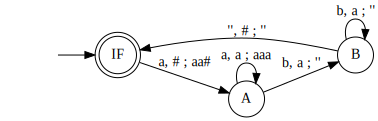

In [3]:
dotObj_pda(a2b)

In [4]:
explore_pda('', a2b)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [5]:
explore_pda('abb', a2b)

String abb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'abb', '#')
->  ('A', 'bb', 'aa#')
->  ('B', 'b', 'a#')
->  ('B', '', '#')
->  ('IF', '', '') .


In [6]:
explore_pda('aabbbb', a2b)

String aabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'aabbbb', '#')
->  ('A', 'abbbb', 'aa#')
->  ('A', 'bbbb', 'aaaa#')
->  ('B', 'bbb', 'aaa#')
->  ('B', 'bb', 'aa#')
->  ('B', 'b', 'a#')
->  ('B', '', '#')
->  ('IF', '', '') .


In [7]:
explore_pda('aaabbbbbb', a2b)

String aaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'aaabbbbbb', '#')
->  ('A', 'aabbbbbb', 'aa#')
->  ('A', 'abbbbbb', 'aaaa#')
->  ('A', 'bbbbbb', 'aaaaaa#')
->  ('B', 'bbbbb', 'aaaaa#')
->  ('B', 'bbbb', 'aaaa#')
->  ('B', 'bbb', 'aaa#')
->  ('B', 'bb', 'aa#')
->  ('B', 'b', 'a#')
->  ('B', '', '#')
->  ('IF', '', '') .


In [8]:
explore_pda('ab', a2b)

String ab rejected by your PDA :-(
Visited states are:
{('A', 'b', 'aa#'), ('IF', 'ab', '#'), ('B', '', 'a#')}


In [9]:
explore_pda('b', a2b)

String b rejected by your PDA :-(
Visited states are:
{('IF', 'b', '#')}


In [10]:
explore_pda('aba', a2b)

String aba rejected by your PDA :-(
Visited states are:
{('A', 'ba', 'aa#'), ('B', 'a', 'a#'), ('IF', 'aba', '#')}


In [11]:
explore_pda('abba', a2b)

String abba rejected by your PDA :-(
Visited states are:
{('IF', 'abba', '#'), ('A', 'bba', 'aa#'), ('B', 'a', '#'), ('IF', 'a', ''), ('B', 'ba', 'a#')}


### Add your own test cases here:

In [12]:
# Accepting test case 1:
explore_pda('aaaabbbbbbbb', a2b)

String aaaabbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'aaaabbbbbbbb', '#')
->  ('A', 'aaabbbbbbbb', 'aa#')
->  ('A', 'aabbbbbbbb', 'aaaa#')
->  ('A', 'abbbbbbbb', 'aaaaaa#')
->  ('A', 'bbbbbbbb', 'aaaaaaaa#')
->  ('B', 'bbbbbbb', 'aaaaaaa#')
->  ('B', 'bbbbbb', 'aaaaaa#')
->  ('B', 'bbbbb', 'aaaaa#')
->  ('B', 'bbbb', 'aaaa#')
->  ('B', 'bbb', 'aaa#')
->  ('B', 'bb', 'aa#')
->  ('B', 'b', 'a#')
->  ('B', '', '#')
->  ('IF', '', '') .


In [13]:
# Accepting test case 2:
explore_pda('aaaaaaaaaabbbbbbbbbbbbbbbbbbbb', a2b)

String aaaaaaaaaabbbbbbbbbbbbbbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'aaaaaaaaaabbbbbbbbbbbbbbbbbbbb', '#')
->  ('A', 'aaaaaaaaabbbbbbbbbbbbbbbbbbbb', 'aa#')
->  ('A', 'aaaaaaaabbbbbbbbbbbbbbbbbbbb', 'aaaa#')
->  ('A', 'aaaaaaabbbbbbbbbbbbbbbbbbbb', 'aaaaaa#')
->  ('A', 'aaaaaabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaa#')
->  ('A', 'aaaaabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaa#')
->  ('A', 'aaaabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaa#')
->  ('A', 'aaabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaa#')
->  ('A', 'aabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaa#')
->  ('A', 'abbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaaa#')
->  ('A', 'bbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaa#'

In [14]:
# Rejected test case 1:
explore_pda('aabbbab', a2b)

String aabbbab rejected by your PDA :-(
Visited states are:
{('IF', 'aabbbab', '#'), ('B', 'bab', 'aa#'), ('B', 'ab', 'a#'), ('B', 'bbab', 'aaa#'), ('A', 'abbbab', 'aa#'), ('A', 'bbbab', 'aaaa#')}


In [15]:
# Rejected test case 2:
explore_pda('bba', a2b)

String bba rejected by your PDA :-(
Visited states are:
{('IF', 'bba', '#')}


## Question 4:

Design a PDA for language Lif in question 1. 

- Hint: when a = 2, the PDA matches b's and c's (using the stack for this match). Else, it only checks their order of arrival (and simply ignores the stack).
- Test your PDA on these strings:
  - aabbbccc   (accept)
  - aabbbbcccc (accept)
  - aa         (accept)
  - abbbcccc (accept)
  - aaabbc   (accept)
  - Epsilon    (accept, as there are zero a's)
  - abbcc    (accept, as there is no constraint to not match b's and c's if two a's)
  - cb        (reject)
  - aabbcca (reject)
  - abba     (reject)
  - ccac       (reject)
  - abba       (reject)
  - baac       (reject)
  - ac         (accept)
- Then add three more accepting test cases and three more rejecting test cases. Document the tests saying why they must pass/fail

In [91]:
Lif = md2mc('''
PDA

!! Overall Algorithm
!! The basic idea is we process the first character in the string and move to a stage where we loop only on that character, and if we see one of the latter characters
!!  transition to that stage where we do the same, and if in one of these stages we see one of the preceding characters, we fail because the characters need to be in
!!  the order of aaa...bbb...ccc...
!! First, though, we make sure that if there is an a followed by an a, we temporarily transition to a special state where if the next character is b or c, we move down 
!!  a different route of transitions where we make sure that the number of 'b' characters is equal to the number of 'c' characters, and that the characters a, b, and c still
!!  appear in the correct order while still being appearing in the right amounts.



I : a, # ; a# -> A  !! If from I, any of the three characters are seen, move to that specific stage. If nothing, move to F because '' is a valid string.
I : b, # ; b# -> B
I : c, # ; c# -> F
I : '', #; #  -> F

A : a, a ; aa -> A2 !! At this stage, if a second 'a' is seen, move to the special case in case there are no more a's after this to handle the if condition
A : b, a  ; ba -> B !! If a b, move to the relevant stage as there should be no more 'a's.
A : c, a  ; ca -> F !! Same for C, move to the last stage.  If only 'c's are seen in that stage, the string is valid.
A : '', a ; a  -> F !! If there is nothing else left, the string is valid so move to F

B : b, b ; b  -> B  !! While in B, loop on every additional 'b' character, only transitioning out if a 'c' appears or there is nothing else after this.
B : c, b ; cb -> F
B : '', b ; b -> F

F : c, c ; c -> F   !! While in F, we only stay here if we keep seeing 'c' characters or we run out of things to process.
F : '', c; c -> F


A2 : a, a ; aa -> A3 !! Special case, if we see more 'a' then we move out and return to the normal process.
A2 : b, a ; ba -> B2 !! Still special case, a b means string is accepted only on special condition, start that determination by pushing 'b' onto the stack and moving to the special stage
A2 : '', a; a  -> F  !! Unique case when number of 'a's is 2. If nothing after this, string is valid because number of b's and c's are the same.

A3 : a, a ; a -> A3  !! normal processing case for 'a', as long as we keep seeing 'a's or see another character then we proceed similarly to the other two characters.
A3 : b, a ; ba -> B
A3 : c, a ; ca -> F
A3 : '', a; a  -> F

B2 : b, b ; bb -> B2 !! Special case, keep track of the number of 'b's we've seen by adding them to the stack.  Transition out on a 'c'
B2 : c, b ; '' -> C2

C2 : c, b ; '' -> C2 !! Special case, now that we've seen a c, we continue removing 'b's until we run out of c's.
C2 : '', a; a  -> F  !! If there is nothing left and the character left is an 'a', the string is valid because the number of b's and c's are equal because we can't remove 'a' in this step.

''')

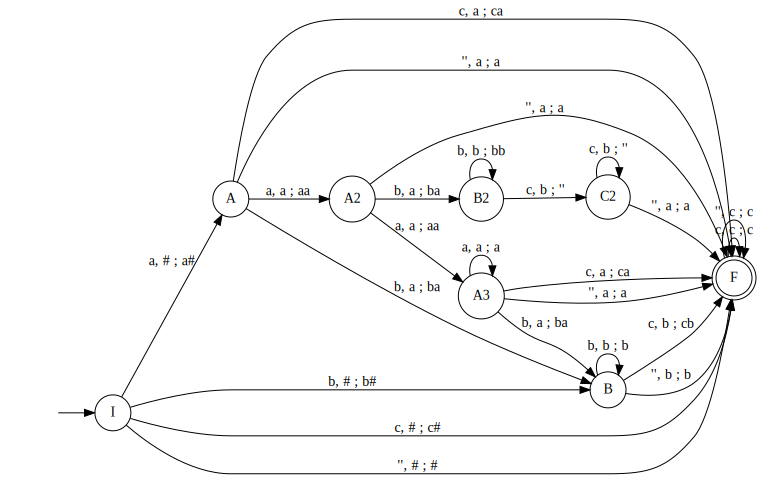

In [67]:
dotObj_pda(Lif)

### Given test cases:

* aa bbb ccc   (accept)

In [68]:
explore_pda('aabbbccc', Lif)

String aabbbccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', 'aa#')
Reached as follows:
->  ('I', 'aabbbccc', '#')
->  ('A', 'abbbccc', 'a#')
->  ('A2', 'bbbccc', 'aa#')
->  ('B2', 'bbccc', 'baa#')
->  ('B2', 'bccc', 'bbaa#')
->  ('B2', 'ccc', 'bbbaa#')
->  ('C2', 'cc', 'bbaa#')
->  ('C2', 'c', 'baa#')
->  ('C2', '', 'aa#')
->  ('F', '', 'aa#') .


* aa bbbb cccc (accept)
 

In [69]:
explore_pda('aabbbbcccc', Lif)

String aabbbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', 'aa#')
Reached as follows:
->  ('I', 'aabbbbcccc', '#')
->  ('A', 'abbbbcccc', 'a#')
->  ('A2', 'bbbbcccc', 'aa#')
->  ('B2', 'bbbcccc', 'baa#')
->  ('B2', 'bbcccc', 'bbaa#')
->  ('B2', 'bcccc', 'bbbaa#')
->  ('B2', 'cccc', 'bbbbaa#')
->  ('C2', 'ccc', 'bbbaa#')
->  ('C2', 'cc', 'bbaa#')
->  ('C2', 'c', 'baa#')
->  ('C2', '', 'aa#')
->  ('F', '', 'aa#') .


* aa         (accept)

In [70]:
explore_pda('aa', Lif)

String aa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', 'aa#')
Reached as follows:
->  ('I', 'aa', '#')
->  ('A', 'a', 'a#')
->  ('A2', '', 'aa#')
->  ('F', '', 'aa#') .


* a bbb cccc (accept)

In [71]:
explore_pda('abbbcccc', Lif)

String abbbcccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', 'cba#')
Reached as follows:
->  ('I', 'abbbcccc', '#')
->  ('A', 'bbbcccc', 'a#')
->  ('B', 'bbcccc', 'ba#')
->  ('B', 'bcccc', 'ba#')
->  ('B', 'cccc', 'ba#')
->  ('F', 'ccc', 'cba#')
->  ('F', 'cc', 'cba#')
->  ('F', 'c', 'cba#')
->  ('F', '', 'cba#') .
Final state  ('F', '', 'cba#')
Reached as follows:
->  ('I', 'abbbcccc', '#')
->  ('A', 'bbbcccc', 'a#')
->  ('B', 'bbcccc', 'ba#')
->  ('B', 'bcccc', 'ba#')
->  ('B', 'cccc', 'ba#')
->  ('F', 'ccc', 'cba#')
->  ('F', 'cc', 'cba#')
->  ('F', 'c', 'cba#')
->  ('F', '', 'cba#')
->  ('F', '', 'cba#') .


* aaa bb c   (accept)

In [72]:
explore_pda('aaabbc', Lif)

String aaabbc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', 'cbaaa#')
Reached as follows:
->  ('I', 'aaabbc', '#')
->  ('A', 'aabbc', 'a#')
->  ('A2', 'abbc', 'aa#')
->  ('A3', 'bbc', 'aaa#')
->  ('B', 'bc', 'baaa#')
->  ('B', 'c', 'baaa#')
->  ('F', '', 'cbaaa#') .
Final state  ('F', '', 'cbaaa#')
Reached as follows:
->  ('I', 'aaabbc', '#')
->  ('A', 'aabbc', 'a#')
->  ('A2', 'abbc', 'aa#')
->  ('A3', 'bbc', 'aaa#')
->  ('B', 'bc', 'baaa#')
->  ('B', 'c', 'baaa#')
->  ('F', '', 'cbaaa#')
->  ('F', '', 'cbaaa#') .


* Epsilon    (accept, as there are zero a's)

In [73]:
explore_pda('', Lif)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('F', '', '#') .


* a bb cc    (accept, as there is no constraint to not match b's and c's if two a's)

In [74]:
explore_pda('abbcc', Lif)

String abbcc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', 'cba#')
Reached as follows:
->  ('I', 'abbcc', '#')
->  ('A', 'bbcc', 'a#')
->  ('B', 'bcc', 'ba#')
->  ('B', 'cc', 'ba#')
->  ('F', 'c', 'cba#')
->  ('F', '', 'cba#') .
Final state  ('F', '', 'cba#')
Reached as follows:
->  ('I', 'abbcc', '#')
->  ('A', 'bbcc', 'a#')
->  ('B', 'bcc', 'ba#')
->  ('B', 'cc', 'ba#')
->  ('F', 'c', 'cba#')
->  ('F', '', 'cba#')
->  ('F', '', 'cba#') .


* b c must accept too

In [75]:
explore_pda('bc', Lif)

String bc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', 'cb#')
Reached as follows:
->  ('I', 'bc', '#')
->  ('B', 'c', 'b#')
->  ('F', '', 'cb#') .
Final state  ('F', '', 'cb#')
Reached as follows:
->  ('I', 'bc', '#')
->  ('B', 'c', 'b#')
->  ('F', '', 'cb#')
->  ('F', '', 'cb#') .


* c b        (reject)

In [76]:
explore_pda('cb', Lif)

String cb rejected by your PDA :-(
Visited states are:
{('F', 'cb', '#'), ('I', 'cb', '#'), ('F', 'b', 'c#')}


* aa bb cc a (reject)

In [77]:
explore_pda('aabbcca', Lif)

String aabbcca rejected by your PDA :-(
Visited states are:
{('F', 'a', 'aa#'), ('A2', 'bbcca', 'aa#'), ('F', 'bbcca', 'aa#'), ('F', 'aabbcca', '#'), ('C2', 'ca', 'baa#'), ('B2', 'bcca', 'baa#'), ('F', 'abbcca', 'a#'), ('C2', 'a', 'aa#'), ('A', 'abbcca', 'a#'), ('B2', 'cca', 'bbaa#'), ('I', 'aabbcca', '#')}


* a bb a     (reject)

In [78]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('B', 'a', 'ba#'), ('F', 'a', 'ba#'), ('F', 'bba', 'a#'), ('B', 'ba', 'ba#'), ('F', 'ba', 'ba#'), ('I', 'abba', '#'), ('F', 'abba', '#'), ('A', 'bba', 'a#')}


* ccac       (reject)

In [79]:
explore_pda('ccac', Lif)

String ccac rejected by your PDA :-(
Visited states are:
{('F', 'cac', 'c#'), ('F', 'ac', 'c#'), ('I', 'ccac', '#'), ('F', 'ccac', '#')}


* abba       (reject)

In [80]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('B', 'a', 'ba#'), ('F', 'a', 'ba#'), ('F', 'bba', 'a#'), ('B', 'ba', 'ba#'), ('F', 'ba', 'ba#'), ('I', 'abba', '#'), ('F', 'abba', '#'), ('A', 'bba', 'a#')}


* baac       (reject)

In [81]:
explore_pda('baac', Lif)

String baac rejected by your PDA :-(
Visited states are:
{('F', 'baac', '#'), ('I', 'baac', '#'), ('F', 'aac', 'b#'), ('B', 'aac', 'b#')}


* ac         (accept), as there are no b's  

In [82]:
explore_pda('ac', Lif)

String ac accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', 'ca#')
Reached as follows:
->  ('I', 'ac', '#')
->  ('A', 'c', 'a#')
->  ('F', '', 'ca#') .
Final state  ('F', '', 'ca#')
Reached as follows:
->  ('I', 'ac', '#')
->  ('A', 'c', 'a#')
->  ('F', '', 'ca#')
->  ('F', '', 'ca#') .


* acb (reject)

In [83]:
explore_pda('acb', Lif)

String acb rejected by your PDA :-(
Visited states are:
{('F', 'b', 'ca#'), ('A', 'cb', 'a#'), ('F', 'acb', '#'), ('I', 'acb', '#'), ('F', 'cb', 'a#')}


### Add your test cases below:

In [84]:
# Should accept as strings without a's are valid according to the language
explore_pda('cccc', Lif)

String cccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', 'c#')
Reached as follows:
->  ('I', 'cccc', '#')
->  ('F', 'ccc', 'c#')
->  ('F', 'cc', 'c#')
->  ('F', 'c', 'c#')
->  ('F', '', 'c#') .
Final state  ('F', '', 'c#')
Reached as follows:
->  ('I', 'cccc', '#')
->  ('F', 'ccc', 'c#')
->  ('F', 'cc', 'c#')
->  ('F', 'c', 'c#')
->  ('F', '', 'c#')
->  ('F', '', 'c#') .


In [85]:
# Should accept like above because a's are not needed as long as the b's and c's come in correct order
explore_pda('bbbbcc', Lif)

String bbbbcc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', 'cb#')
Reached as follows:
->  ('I', 'bbbbcc', '#')
->  ('B', 'bbbcc', 'b#')
->  ('B', 'bbcc', 'b#')
->  ('B', 'bcc', 'b#')
->  ('B', 'cc', 'b#')
->  ('F', 'c', 'cb#')
->  ('F', '', 'cb#') .
Final state  ('F', '', 'cb#')
Reached as follows:
->  ('I', 'bbbbcc', '#')
->  ('B', 'bbbcc', 'b#')
->  ('B', 'bbcc', 'b#')
->  ('B', 'bcc', 'b#')
->  ('B', 'cc', 'b#')
->  ('F', 'c', 'cb#')
->  ('F', '', 'cb#')
->  ('F', '', 'cb#') .


In [86]:
# Should accept because the number of b's and c's match
explore_pda('aabbbbbbbbbbbbbbbccccccccccccccc', Lif)

String aabbbbbbbbbbbbbbbccccccccccccccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', 'aa#')
Reached as follows:
->  ('I', 'aabbbbbbbbbbbbbbbccccccccccccccc', '#')
->  ('A', 'abbbbbbbbbbbbbbbccccccccccccccc', 'a#')
->  ('A2', 'bbbbbbbbbbbbbbbccccccccccccccc', 'aa#')
->  ('B2', 'bbbbbbbbbbbbbbccccccccccccccc', 'baa#')
->  ('B2', 'bbbbbbbbbbbbbccccccccccccccc', 'bbaa#')
->  ('B2', 'bbbbbbbbbbbbccccccccccccccc', 'bbbaa#')
->  ('B2', 'bbbbbbbbbbbccccccccccccccc', 'bbbbaa#')
->  ('B2', 'bbbbbbbbbbccccccccccccccc', 'bbbbbaa#')
->  ('B2', 'bbbbbbbbbccccccccccccccc', 'bbbbbbaa#')
->  ('B2', 'bbbbbbbbccccccccccccccc', 'bbbbbbbaa#')
->  ('B2', 'bbbbbbbccccccccccccccc', 'bbbbbbbbaa#')
->  ('B2', 'bbbbbbccccccccccccccc', 'bbbbbbbbbaa#')
->  ('B2', 'bbbbbccccccccccccccc', 'bbbbbbbbbbaa#')
->  ('B2', 'bbbbccccccccccccccc', 'bbbbbbbbbbbaa#')
->  ('B2', 'bbbccccccccccccccc', 'bbbbbbbbbbbbaa#')
->  ('B2', 'bbccccccccccccccc', 'bbbbbbbbbbbbbaa#')
->  ('B2', 'bccccccccccc

In [87]:
# Should be rejected because a 'b' is out of order
explore_pda('abbcb', Lif)

String abbcb rejected by your PDA :-(
Visited states are:
{('F', 'b', 'cba#'), ('B', 'cb', 'ba#'), ('F', 'cb', 'ba#'), ('I', 'abbcb', '#'), ('B', 'bcb', 'ba#'), ('F', 'bcb', 'ba#'), ('A', 'bbcb', 'a#'), ('F', 'bbcb', 'a#'), ('F', 'abbcb', '#')}


In [88]:
# Should be rejected because a 'c' is out of order
explore_pda('aaabbcbccc', Lif)

String aaabbcbccc rejected by your PDA :-(
Visited states are:
{('A2', 'abbcbccc', 'aa#'), ('F', 'aaabbcbccc', '#'), ('F', 'bbcbccc', 'aaa#'), ('F', 'abbcbccc', 'aa#'), ('B', 'bcbccc', 'baaa#'), ('A3', 'bbcbccc', 'aaa#'), ('F', 'cbccc', 'baaa#'), ('F', 'aabbcbccc', 'a#'), ('B', 'cbccc', 'baaa#'), ('F', 'bccc', 'cbaaa#'), ('I', 'aaabbcbccc', '#'), ('F', 'bcbccc', 'baaa#'), ('A', 'aabbcbccc', 'a#')}


In [89]:
# Should be rejected because the number of 'b's and 'c's don't match
explore_pda('aabbbcc', Lif)

String aabbbcc rejected by your PDA :-(
Visited states are:
{('F', 'aabbbcc', '#'), ('F', 'bbbcc', 'aa#'), ('B2', 'bbcc', 'baa#'), ('A', 'abbbcc', 'a#'), ('I', 'aabbbcc', '#'), ('F', 'abbbcc', 'a#'), ('C2', 'c', 'bbaa#'), ('A2', 'bbbcc', 'aa#'), ('C2', '', 'baa#'), ('B2', 'cc', 'bbbaa#'), ('B2', 'bcc', 'bbaa#')}


# END
